In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import geomstats.backend as gs
import geomstats.visualization as visualization

from geomstats.learning.frechet_mean import FrechetMean
from geomstats.geometry.matrices import Matrices, MatricesMetric

INFO: Using numpy backend


In [2]:
time_names = pd.read_csv('time_names.csv', index_col=0)
time_names = time_names['time'].to_numpy()

time_names = time_names[time_names != 'D8.25']
time_names = time_names[time_names != 'D8.75']

# df = pd.read_csv(r'..\wot\data\full_df.csv')
df = pd.read_csv('ot_df.csv')
df = df[df['day'] != 8.25]
df = df[df['day'] != 8.75]
time_labels = [float(i[1:]) for i in time_names]
sample_size = pd.DataFrame()
sample_size['day'] = time_labels
sample_size['sample size'] = df.groupby('day').size().to_numpy()
T = len(time_labels)
k = len(np.unique(df['cell type']))


In [3]:
dfval= df[['x','y']].values

In [9]:
sample_size

,day,sample size
0,0.0,4732
1,0.5,3528
2,1.0,3822
3,1.5,2011
4,2.0,9898
5,2.5,7075
6,3.0,6971
7,3.5,8240
8,4.0,9160
9,4.5,7268


In [4]:
d= k-1 
from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=d) 
mfd= sphere.metric

In [5]:
type_list = df['cell type'].unique()
probs = []
for t in range(T):
    p_temp = df['cell type'][df['day'] == time_labels[t]].value_counts(normalize=True).reindex(type_list, fill_value=0).to_numpy()
    probs.append(p_temp)
probs = np.array(probs)

In [6]:
type_list

array(['MEF', 'MET', 'Stromal', 'Trophoblast', 'Neural', 'Epithelial',
       'IPS'], dtype=object)

In [6]:
data=np.sqrt(probs)
#data2=np.sqrt(probs2)

In [7]:
data_df = pd.DataFrame(data=data,index= np.arange(37),columns=type_list.tolist())


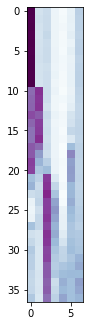

In [10]:
plt.figure(figsize=(1,6))
plt.imshow(data_df,cmap='BuPu',)

In [8]:
import seaborn as sns

In [9]:
#data_df_reset = data_df2.reset_index()

# Now, melt the DataFrame to long format
# 'Time' is the name of the former index column
# # 'CellType' will be the new column with cell types
# # 'Measurement' will be the column with the corresponding values
# long_df = data_df.melt(id_vars=['index'], var_name='CellType', value_name='Measurement')
# long_df = long_df.rename(columns={'index': 'Time'})

# # Create the plot
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=long_df, x='Time', y='Measurement', hue='CellType', palette='bright')

# # Adding labels and title (optional)
# plt.xlabel('Time')
# plt.ylabel('Measurement')
# plt.title('Curve Plot for Different Cell Types')

# # Show the plot
# plt.show()

In [10]:
data_df,

,MEF,MET,Stromal,Trophoblast,Neural,Epithelial,IPS
0,0.890805,0.204038,0.228468,0.105832,0.066617,0.128388,0.283753
1,0.887843,0.212959,0.232676,0.110400,0.075292,0.133631,0.276642
2,0.890675,0.203964,0.233285,0.108508,0.085592,0.127365,0.274505
3,0.888347,0.199452,0.245294,0.109245,0.073959,0.149589,0.266663
4,0.892539,0.204021,0.231619,0.109186,0.076549,0.114162,0.278008
5,0.886810,0.207968,0.232668,0.112158,0.068296,0.140670,0.281340
6,0.892356,0.209171,0.231936,0.113625,0.081233,0.123312,0.267280
7,0.896460,0.202832,0.216996,0.105665,0.080200,0.123658,0.274304
8,0.891983,0.202334,0.225067,0.116817,0.071631,0.127111,0.278995
9,0.894627,0.201125,0.221939,0.099531,0.074186,0.128494,0.279308


In [12]:
probs

array([[0.79353339, 0.04163145, 0.0521978 , 0.01120034, 0.00443787,
        0.01648352, 0.08051564],
       [0.78826531, 0.04535147, 0.05413832, 0.01218821, 0.00566893,
        0.01785714, 0.07653061],
       [0.79330194, 0.04160126, 0.05442177, 0.01177394, 0.00732601,
        0.01622187, 0.07535322],
       [0.78915962, 0.0397812 , 0.06016907, 0.01193436, 0.00546992,
        0.02237693, 0.0711089 ],
       [0.79662558, 0.04162457, 0.0536472 , 0.0119216 , 0.00585977,
        0.01303294, 0.07728834],
       [0.7864311 , 0.04325088, 0.05413428, 0.01257951, 0.00466431,
        0.01978799, 0.07915194],
       [0.79629895, 0.04375269, 0.05379429, 0.01291063, 0.00659877,
        0.01520585, 0.07143882],
       [0.80364078, 0.04114078, 0.04708738, 0.01116505, 0.00643204,
        0.01529126, 0.07524272],
       [0.79563319, 0.04093886, 0.05065502, 0.01364629, 0.005131  ,
        0.01615721, 0.07783843],
       [0.80035773, 0.04045129, 0.04925702, 0.00990644, 0.00550358,
        0.01651073, 0.0

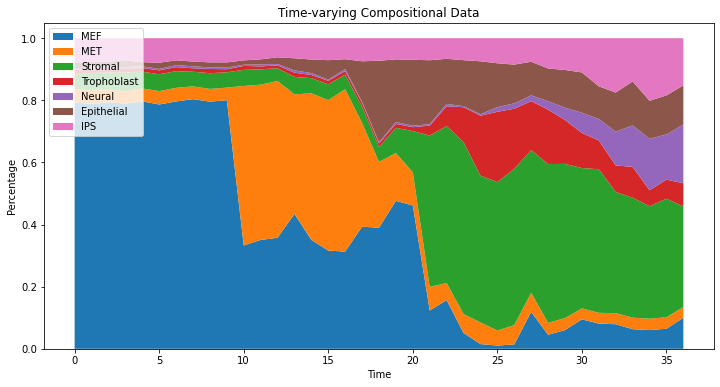

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_df is your DataFrame where rows are time points and columns are components

# Plotting
plt.figure(figsize=(12, 6))
plt.stackplot(data_df.index, [data_df[col] for col in data_df.columns], labels=data_df.columns)
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Percentage')
plt.title('Time-varying Compositional Data')
plt.show()


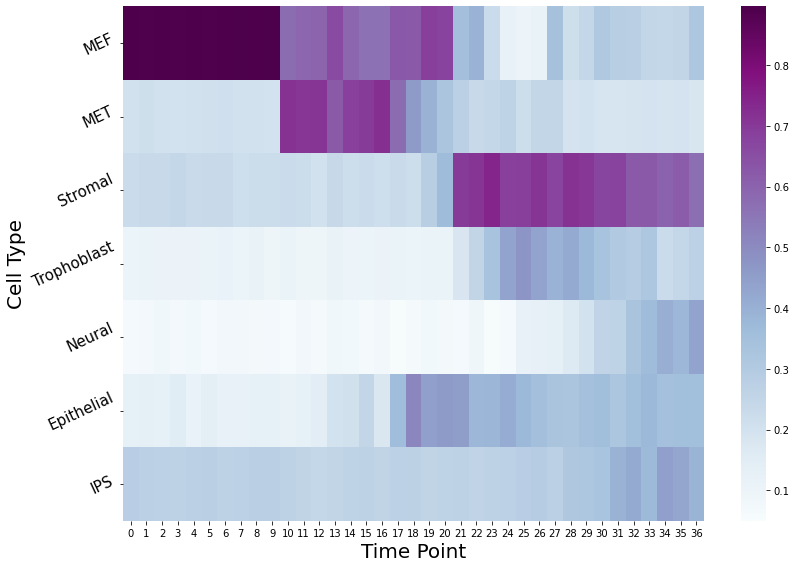

In [16]:
#data_df.style.background_gradient(cmap='Blues',)
fig, ax = plt.subplots(figsize=(12,8))
#sns.heatmap(data_df.T,cmap=sns.cubehelix_palette(as_cmap=True),ax=ax)
sns.heatmap(data_df.T,cmap='BuPu',ax=ax, vmin=0.05)
ax.set_xlabel("Time Point",fontsize=20)
ax.set_ylabel("Cell Type",fontsize=20)

#ax.xaxis.tick_top()

ax.set_yticklabels(labels=type_list.tolist(),fontsize=15,rotation=25)
plt.tight_layout()
plt.savefig('Cell_type_prop_SR.png',facecolor='w')

In [37]:
data_df

,MEF,MET,Stromal,Trophoblast,Neural,Epithelial,IPS
0,0.793533,0.041631,0.052198,0.011200,0.004438,0.016484,0.080516
1,0.788265,0.045351,0.054138,0.012188,0.005669,0.017857,0.076531
2,0.793302,0.041601,0.054422,0.011774,0.007326,0.016222,0.075353
3,0.789160,0.039781,0.060169,0.011934,0.005470,0.022377,0.071109
4,0.796626,0.041625,0.053647,0.011922,0.005860,0.013033,0.077288
5,0.786431,0.043251,0.054134,0.012580,0.004664,0.019788,0.079152
6,0.796299,0.043753,0.053794,0.012911,0.006599,0.015206,0.071439
7,0.803641,0.041141,0.047087,0.011165,0.006432,0.015291,0.075243
8,0.795633,0.040939,0.050655,0.013646,0.005131,0.016157,0.077838
9,0.800358,0.040451,0.049257,0.009906,0.005504,0.016511,0.078013


In [15]:
fmean = FrechetMean(metric=mfd,epsilon=0.0000001,max_iter=10000)
fmean.fit(data)
mean =fmean.estimate_
#mean

In [16]:
def resvec_to_sum(res_vec,w=3):
    # local sum 
    dim = res_vec.shape[1]
    N = res_vec.shape[0]
    res =np.zeros((N-w+1,dim))
    for i in range(dim):
        res[:,i] = np.convolve(res_vec[:,i], np.ones(w), 'valid')
    
    return res

def gamma_m(res_vec,w=3):
    localvar = resvec_to_sum(res_vec,w)**2
    n,dim = localvar.shape
    res = np.zeros((n,dim))
    for i in range(dim):
        res[:,i] = np.cumsum(localvar[:,i])/(w*n)
    return(res)


def volatity(res_vec,wlst):
    wm =max(wlst)
    L = len(wlst)
    n,dim = res_vec.shape
    localvar_res=np.zeros(shape=(n-wm+1 ,dim,L))
    for i in range(L):
         localvar_res[:,:,i] = gamma_m(res_vec,wlst[i])[:(n-wm+1),]
    
    vol = np.zeros((n-wm+1, dim,L-2))
    for j in range(n-wm+1):
        for k in range(dim):
            for i in range(L-2):
                vol[j,k,i] = np.std(localvar_res[j,k,i:(i+3)])
    
    vol_sum = np.sum(vol,axis=1)
    
    return np.max(vol_sum,axis=0)

def select_window(res_vec,wlst):
    vol = volatity(res_vec,wlst)
    idx = np.argmin(np.max(vol,axis=0))
    return(wlst[idx+1])
    

In [17]:
def local_sum(res,w=3):
    # local sum for reisduals
    dim = res.shape[1]
    N = res.shape[0]
    locsum =np.zeros((N-w+1,dim))
    for i in range(dim):
        locsum[:,i] = np.convolve(res[:,i], np.ones(w), 'valid')
    
    return locsum

def Hess(res,mu):
    theta= np.sqrt(mfd.inner_product(res,res,mu)) 
    u = res/theta
    ftheta=theta/np.sin(theta)
    u = np.reshape(u,(d+1,1))
    x = np.reshape(mu,(d+1,1))
    
    
    H = np.dot(u,np.transpose(u)) + ftheta*np.cos(theta)* (
        np.eye(7)-np.dot(u,np.transpose(u))-np.dot(x,np.transpose(x)))
    return(H)
    

def Hprocess(residual,mean):
    N = residual.shape[0]
    h = np.zeros((N,7,7))
    for i in range(N):
        h[i,:,:] = Hess(residual[i,:],mean)/N
    H = np.cumsum(h,axis=0)
    return(H)

def Hinv(y,mean,H):
    l,v= np.linalg.eig(H)
    lidx = [0,1,2,3,4,5,6]
    lidx.remove(np.argmin(np.abs(l)))
    l = l[lidx]
    v = v[:,lidx]
    invvec = np.zeros(7)
    #invvec
    for k in range(6):
        invvec = mfd.inner_product(y,v[:,k])*v[:,k]/l[k] + invvec
        #mfd.inner_product(y,v[:,1])*v[:,1]/l[1]+mfd.inner_product(y,v[:,0])*v[:,0]/l[0]
    return(invvec)


def generate_Phi(locsum):
    #Philst = np.zeros(locsum.shape)
    n = locsum.shape[0]
    g = np.random.normal(size=n)
    g = g.reshape((n,1))
    dPhi = g*locsum
    Phi = np.cumsum(dPhi,axis=0)
    return Phi



def bootstrap_test(residual, mean, w=24 ,B=400,seed=2023):
    n =residual.shape[0]
    res_cusum =np.cumsum(residual,axis=0)
    Ht = Hprocess(residual,mean)
    res_cusum_norm = np.sqrt(mfd.inner_product(res_cusum,res_cusum,mean))

    Tn = res_cusum_norm.max()/np.sqrt(n)
    
    B =B# bootstrap size 
    Boot_Stat= np.zeros(B) 
    locsum = local_sum(residual,w=w)
    
    for i in range(B):
        np.random.seed(seed*2023+i)
        Phi = generate_Phi(locsum)/np.sqrt(w*(n-w+1))
        
        HinvPhi = Hinv(Phi[n-w],mean,Ht[n-w])
        
        for k in range(n-w+1):
            Phi[k] = Phi[k]-np.dot(Ht[k],HinvPhi)
           
        
        Phinorm = np.sqrt(mfd.inner_product(Phi,Phi,mean))
        
        Boot_Stat[i] = np.max(Phinorm[w:])
     
        
    
#     for i in range(B):
#         np.random.seed(seed+i)
#         Phi = generate_Phi(locsum)/np.sqrt(w*(n-w+1))
#         for k in range(n-w+1):
#             Phi[k] = Phi[k]-(k+1)/(n-w+1)*Phi[n-w]
        
#         Phinorm = np.sqrt(mfd.inner_product(Phi,Phi,mean))
#         Boot_Stat[i] = np.max(Phinorm[w:])
        
    return np.mean(Boot_Stat>=Tn)

In [20]:
#windows = np.linspace(0.1, 0.1, num=10)*nsamples 
#windows= (np.rint(windows)).astype(int)# window size candidate
B =2000    
windows=   np.array([1,2,3,4,5])
#fmean = FrechetMean(metric=mfd,max_iter=400)
fmean = FrechetMean(metric=mfd,epsilon=0.0000001,max_iter=100000)
fmean.fit(data)
mean =fmean.estimate_
residual = mfd.log(point=data,base_point=mean) # residual
 
w1 = select_window(residual,windows) # selec window size in bootstrap
#Wselect1[m] = w1
    
pval = bootstrap_test(residual, mean, w= w1,B=B,seed=666)

In [ ]:
pval